In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [28]:
X, y, = make_moons(n_samples = 1000, noise = 0.5, random_state = 42)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
model = SVC(kernel = 'rbf', C = 1.0, random_state = 42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [32]:
y_pred = model.predict(X_test_scaled)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy :{accuracy : .4f}")
print("\nClassification Report : ")
print(classification_report(y_test, y_pred))

Accuracy : 0.8200

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       100
           1       0.81      0.83      0.82       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [77]:
def plot_decision_boundary(X, y, model,scaler, ax = None) :
    ax = ax or plt.gca()
    x_min, x_max =X[:, 0 ].min()-0.5, X[:, 0].max() + 0.5
    y_min, y_max =X[:, 0 ].min()-0.5, X[:, 0].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(x_min, x_max, 0.02))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.4)
    plt.scatter(X[:, 0 ], X[:, 1], c = y, alpha = 0.8 )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    return ax

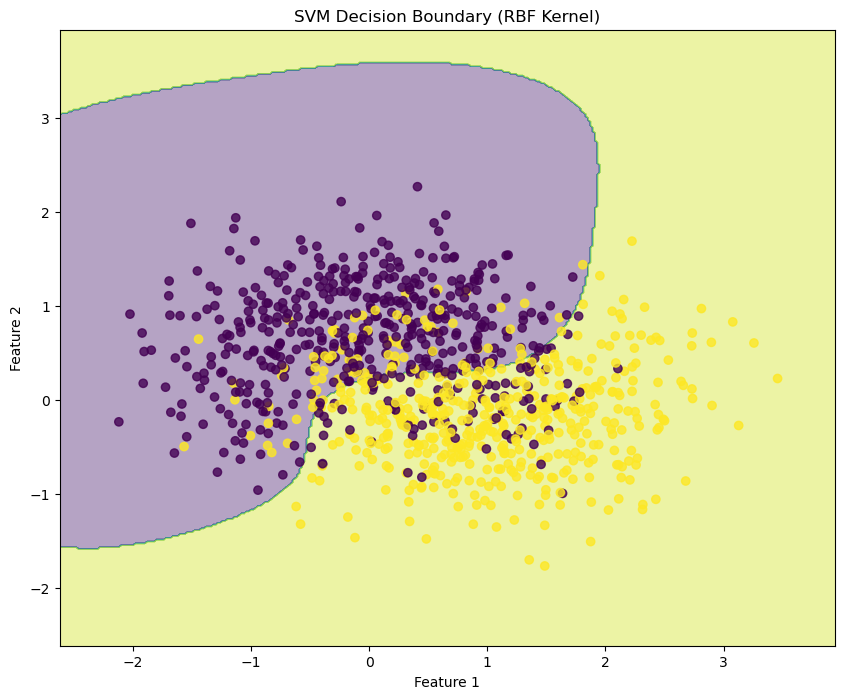

In [79]:
plt.figure(figsize = (10,8))
plot_decision_boundary(X,y, model, scaler)
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()